<a href="https://colab.research.google.com/github/Matinzr/PracticeProjects/blob/main/EDA_on_NOAA_data_Lightining.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import os
from google.colab import drive

# Mount your Google Drive
drive.mount('/content/drive')

# Set the desired folder as your working directory
os.chdir('/content/drive/My Drive/Datasets/Lightining_data_2018')

# Verify your current working directory
!pwd

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
/content/drive/My Drive/Datasets/Lightining_data_2018


In [ ]:
import pandas as pd
import numpy as np
import datetime as dt
import matplotlib.pyplot as plt

In [ ]:
!pwd

/content/drive/My Drive/Datasets/Lightining_data_2018


In [ ]:
# Read in the 2018 lightning strike dataset.
df = pd.read_csv('eda_using_basic_data_functions_in_python_dataset1.csv')

In [ ]:
#inspect the first 10 rows

df.head(n=10)

,date,number_of_strikes,center_point_geom
0,2018-01-03,194,POINT(-75 27)
1,2018-01-03,41,POINT(-78.4 29)
2,2018-01-03,33,POINT(-73.9 27)
3,2018-01-03,38,POINT(-73.8 27)
4,2018-01-03,92,POINT(-79 28)
5,2018-01-03,119,POINT(-78 28)
6,2018-01-03,35,POINT(-79.3 28)
7,2018-01-03,60,POINT(-79.1 28)
8,2018-01-03,41,POINT(-78.7 28)
9,2018-01-03,119,POINT(-78.6 28)


In [ ]:
df.info(null_counts=True)

<ipython-input-12-acd3301a9435>:1: FutureWarning: null_counts is deprecated. Use show_counts instead
  df.info(null_counts=True)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3401012 entries, 0 to 3401011
Data columns (total 3 columns):
 #   Column             Non-Null Count    Dtype 
---  ------             --------------    ----- 
 0   date               3401012 non-null  object
 1   number_of_strikes  3401012 non-null  int64 
 2   center_point_geom  3401012 non-null  object
dtypes: int64(1), object(2)
memory usage: 77.8+ MB


In [ ]:
#Convert date from object to datetime
df['date'] = pd.to_datetime(df['date'])

In [ ]:
df.info(null_counts=True) #EDA- recheck the data

<ipython-input-14-0701f570f59a>:1: FutureWarning: null_counts is deprecated. Use show_counts instead
  df.info(null_counts=True) #EDA- recheck the data


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3401012 entries, 0 to 3401011
Data columns (total 3 columns):
 #   Column             Non-Null Count    Dtype         
---  ------             --------------    -----         
 0   date               3401012 non-null  datetime64[ns]
 1   number_of_strikes  3401012 non-null  int64         
 2   center_point_geom  3401012 non-null  object        
dtypes: datetime64[ns](1), int64(1), object(1)
memory usage: 77.8+ MB


In [ ]:
df.describe()

,number_of_strikes
count,3.401012e+06
mean,1.311403e+01
std,3.212099e+01
min,1.000000e+00
25%,2.000000e+00
50%,4.000000e+00
75%,1.200000e+01
max,2.211000e+03


In [ ]:
df.size

10203036

In [ ]:
df.sample()

,date,number_of_strikes,center_point_geom
3391631,2018-08-15,30,POINT(-72.4 42.6)


In [ ]:
df.shape

(3401012, 3)

In [ ]:
#create a new column "month" in order to group the data later on
df['month'] = df['date'].dt.month
df.head()                           # to check the result

,date,number_of_strikes,center_point_geom,month
0,2018-01-03,194,POINT(-75 27),1
1,2018-01-03,41,POINT(-78.4 29),1
2,2018-01-03,33,POINT(-73.9 27),1
3,2018-01-03,38,POINT(-73.8 27),1
4,2018-01-03,92,POINT(-79 28),1


In [ ]:
#Create a new column "month_txt"
df['month_txt'] = df['date'].dt.month_name().str.slice(stop=3)
df.head(3)

,date,number_of_strikes,center_point_geom,month,month_txt
0,2018-01-03,194,POINT(-75 27),1,Jan
1,2018-01-03,41,POINT(-78.4 29),1,Jan
2,2018-01-03,33,POINT(-73.9 27),1,Jan


In [ ]:
#create a new data frame as a helper for plotting
df_by_month = df.groupby(['month', 'month_txt']).sum().sort_values('month',ascending=True).head(12).reset_index()
df_by_month

<ipython-input-26-0be70b77fde5>:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_by_month = df.groupby(['month', 'month_txt']).sum().sort_values('month',ascending=True).head(12).reset_index()


,month,month_txt,number_of_strikes
0,1,Jan,860045
1,2,Feb,2071315
2,3,Mar,854168
3,4,Apr,1524339
4,5,May,4166726
5,6,Jun,6445083
6,7,Jul,8320400
7,8,Aug,15525255
8,9,Sep,3018336
9,10,Oct,1093962


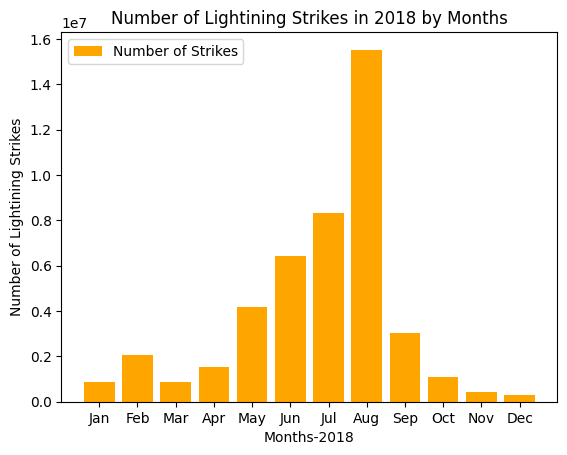

In [ ]:
#Plotting
plt.bar(x=df_by_month['month_txt'], height=df_by_month['number_of_strikes'], label="Number of Strikes", color = "orange")

plt.xlabel("Months-2018")
plt.ylabel("Number of Lightining Strikes")
plt.title("Number of Lightining Strikes in 2018 by Months")

plt.legend()
plt.show()